<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week5_Day3_DailyChallengeipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [9]:
# Load the data from CSV files
data = pd.read_csv("/content/data.csv")

data.head()

# Check how many missing values in each column
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
data_cleaned = data.dropna()
data = data.drop(columns=['Unnamed: 32'])
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


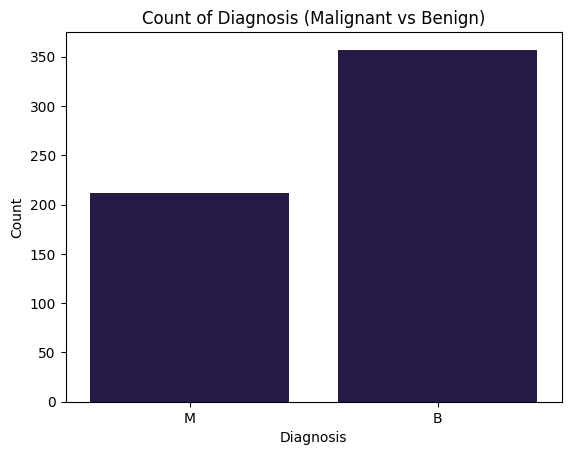

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette to 'magma'
sns.set_palette('magma')

# Create the countplot
sns.countplot(x='diagnosis', data=data)

# Add title and labels
plt.title('Count of Diagnosis (Malignant vs Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Show the plot
plt.show()


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [12]:
# Load data
data = pd.read_csv('/content/data.csv')

# Drop the unnecessary column
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

# Show counts of each category in diagnosis
print("Diagnosis counts:\n", data['diagnosis'].value_counts())

# Map 'M' to 1 and 'B' to 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


Diagnosis counts:
 diagnosis
B    357
M    212
Name: count, dtype: int64


In [13]:
# Separate features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.9736842105263158


In [15]:
#K Nearest Neighbours (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.9473684210526315


In [16]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.9649122807017544


In [17]:
#Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.9736842105263158


Typically, Random Forest or SVM performs the best in this classification task, but it can vary slightly depending on data split and scaling.